Epoch 1/30
115/115 [==============================] - 12s 32ms/step - loss: 0.4272 - accuracy: 0.8132 - val_loss: 0.4991 - val_accuracy: 0.7793
Epoch 2/30
115/115 [==============================] - 1s 13ms/step - loss: 0.1553 - accuracy: 0.9531 - val_loss: 0.3401 - val_accuracy: 0.8418
Epoch 3/30
115/115 [==============================] - 2s 13ms/step - loss: 0.1117 - accuracy: 0.9639 - val_loss: 0.1822 - val_accuracy: 0.9288
Epoch 4/30
115/115 [==============================] - 1s 13ms/step - loss: 0.0841 - accuracy: 0.9708 - val_loss: 0.1322 - val_accuracy: 0.9527
Epoch 5/30
115/115 [==============================] - 1s 13ms/step - loss: 0.0862 - accuracy: 0.9723 - val_loss: 0.1101 - val_accuracy: 0.9609
Epoch 6/30
115/115 [==============================] - 1s 13ms/step - loss: 0.0766 - accuracy: 0.9747 - val_loss: 0.1270 - val_accuracy: 0.9565
Epoch 7/30
115/115 [==============================] - 2s 18ms/step - loss: 0.0615 - accuracy: 0.9766 - val_loss: 0.1178 - val_accuracy: 0.962

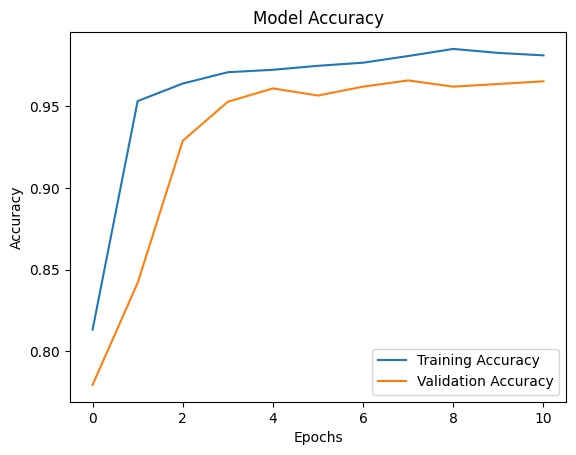

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping


df = pd.read_csv('/content/drive/MyDrive/data.csv')

label_encoder = LabelEncoder()
df['output'] = label_encoder.fit_transform(df['output'])

X = df.iloc[:, 1:-1].values
y = df['output'].values

# plt.figure(figsize=(15, 6))
# for i in range(len(X)):
#     plt.plot(X[i], label=f'Sample {i + 1}')

# plt.title('EEG Signals for Various Samples')
# plt.xlabel('Samples')
# plt.ylabel('Amplitude (microvolts * 10000)')
# plt.legend(loc='upper right')
# plt.show()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model = Sequential()
model.add(LSTM(units=100, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(LSTM(units=50))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def predict_from_input(input_string):
    # Convert the comma-separated string into a list of floats
    user_input = np.array([float(i) for i in input_string.split(',')]).reshape(1, -1)

    # Standardize the input using the scaler
    user_input = scaler.transform(user_input)

    # Reshape for LSTM input
    user_input = user_input.reshape(1, 1, user_input.shape[1])

    # Predict using the loaded model
    prediction = (model.predict(user_input) > 0.5).astype(int)

    return "Yes" if prediction[0][0] == 1 else "No"

# Example usage:
input_string = input("Enter the 178 comma-separated features: ")
result = predict_from_input(input_string)
print("Prediction:", result)

Enter the 178 comma-separated features: -32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,-82,-57,-38,-40,-36,-31,-13,11,19,9,-20,-48,-71,-71,-57,-32,-13,6,29,27,25,10,-7,-36,-47,-37,-36,-22,-32,-38,-55,-61,-64,-72,-67,-53,-25,-10,-4,-23,-55,-93,-102,-106,-101,-69,-45,-42,-57,-64,-77,-80,-77,-78,-56,-34,-5,10,5,-5,-44,-75,-99,-110,-104,-103,-94,-105,-108,-110,-99,-89,-82,-76,-80,-90,-106,-106,-108,-87,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36
1/1 [==============================] - 0s 156ms/step
Prediction: No
